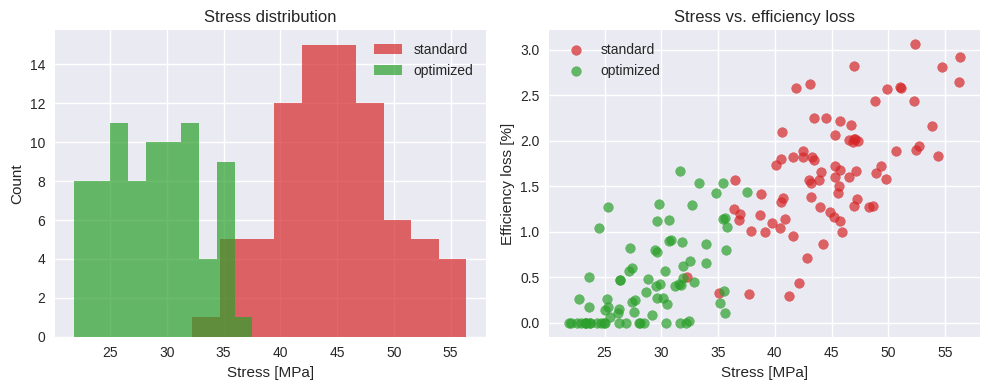

,stress_MPa,eff_loss_percent
config,,
optimized,28.951216,0.466357
standard,44.847289,1.655674


In [3]:
# Stress–efficiency loss analysis in c-Si PV modules

#Synthetic example illustrating how different clamping configurations change mechanical stress and how this correlates with efficiency loss, similar to my internship work on PV module reliability.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8")
# Synthetic stress data for two clamping configurations
np.random.seed(0)

n = 80
stress_standard = np.random.normal(loc=45, scale=5, size=n)   # higher stress
stress_optimized = np.random.normal(loc=28, scale=4, size=n)  # lower stress

# Simple function: higher stress → higher efficiency loss (%)
def efficiency_loss(stress):
    base = 0.5 + 0.08 * (stress - 30)  # linear trend
    noise = np.random.normal(scale=0.5, size=len(stress))
    return np.clip(base + noise, 0, None)

df = pd.DataFrame({
    "stress_MPa": np.concatenate([stress_standard, stress_optimized]),
    "config": ["standard"] * n + ["optimized"] * n
})
df["eff_loss_percent"] = efficiency_loss(df["stress_MPa"])

df.head()
# Synthetic stress data for two clamping configurations
np.random.seed(0)

n = 80
stress_standard = np.random.normal(loc=45, scale=5, size=n)   # higher stress
stress_optimized = np.random.normal(loc=28, scale=4, size=n)  # lower stress

# Simple function: higher stress → higher efficiency loss (%)
def efficiency_loss(stress):
    base = 0.5 + 0.08 * (stress - 30)  # linear trend
    noise = np.random.normal(scale=0.5, size=len(stress))
    return np.clip(base + noise, 0, None)

df = pd.DataFrame({
    "stress_MPa": np.concatenate([stress_standard, stress_optimized]),
    "config": ["standard"] * n + ["optimized"] * n
})
df["eff_loss_percent"] = efficiency_loss(df["stress_MPa"])

df.head()
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

for cfg, color in [("standard", "tab:red"), ("optimized", "tab:green")]:
    subset = df[df["config"] == cfg]
    ax[0].hist(subset["stress_MPa"], bins=10, alpha=0.7, label=cfg, color=color)

ax[0].set_xlabel("Stress [MPa]")
ax[0].set_ylabel("Count")
ax[0].set_title("Stress distribution")
ax[0].legend()

for cfg, color in [("standard", "tab:red"), ("optimized", "tab:green")]:
    subset = df[df["config"] == cfg]
    ax[1].scatter(subset["stress_MPa"], subset["eff_loss_percent"],
                  alpha=0.7, label=cfg, color=color)

ax[1].set_xlabel("Stress [MPa]")
ax[1].set_ylabel("Efficiency loss [%]")
ax[1].set_title("Stress vs. efficiency loss")
ax[1].legend()

plt.tight_layout()
plt.show()
summary = df.groupby("config")[["stress_MPa", "eff_loss_percent"]].mean()
summary
#The synthetic results show that the optimized clamping configuration has lower average mechanical stress and lower efficiency loss than the standard configuration, reflecting the expected trend from stress and EL-based reliability analysis in c-Si PV modules.[file:16]

